# IMPORT LIBRARIES

In [1]:
import matplotlib
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix

In [5]:
# Importing the dataset as csv file.
df = pd.read_csv(r"C:\Users\neena\Downloads\diabetes3.csv")

In [7]:
# Quick look at the data.  Printing first five rows.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Evaluating the data for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

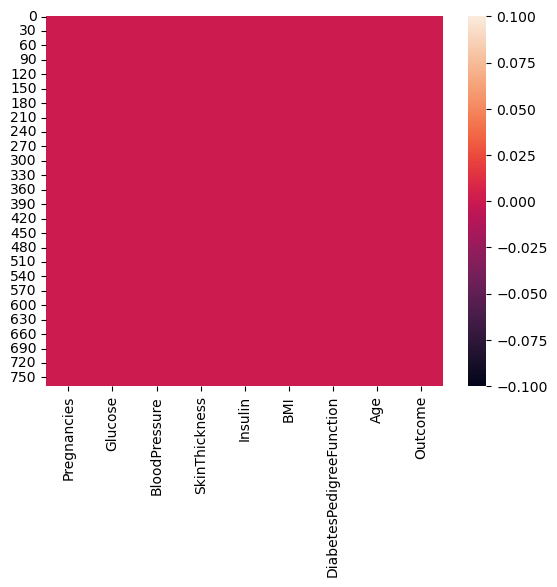

In [10]:
# Heatmap to visualize null values
sns.heatmap(df.isnull())

In [13]:
# Establishing interdependency between two or more variables using a
# correlation matrix.
correlation = df.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

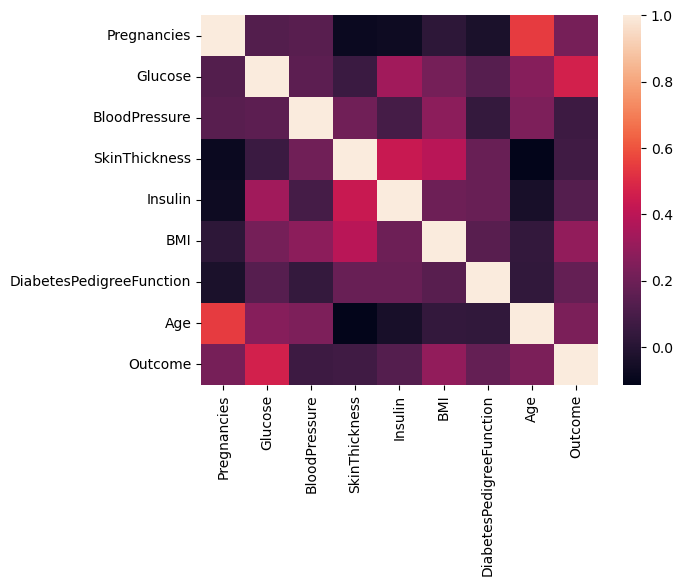

In [14]:
# Heatmap to visualize interdependencies.
sns.heatmap(correlation)

In [15]:
# getting the statistical measures of the data
two_df = df.describe()
two_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
# Outcome value 0 = non-diabetic, 1 = diabetic.  Mean values by outcome.
df['Outcome'].value_counts()
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [17]:
# separating the data and labels
X = df.drop(columns='Outcome', axis=1)
Y = df['Outcome']

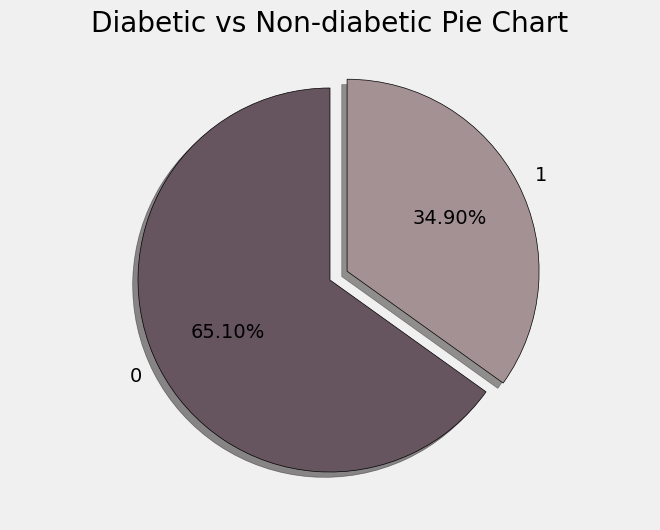

In [18]:
# Displaying the pie chart
new_df = df['Outcome'].value_counts().rename_axis('category').reset_index(name='counts')

plt.style.use("fivethirtyeight")

# Set labels and values for pie chart
your_labels = new_df.category
your_values = new_df.counts
colors = ['#66545e', '#a39193']
fig = matplotlib.pyplot.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
explode = [0, 0.1]

ax.pie(your_values, labels=your_labels, colors=colors, explode=explode,
       shadow=True, startangle=90, autopct='%1.2f%%',
       wedgeprops={'edgecolor': 'black'})
matplotlib.pyplot.title('Diabetic vs Non-diabetic Pie Chart')
matplotlib.pyplot.show()

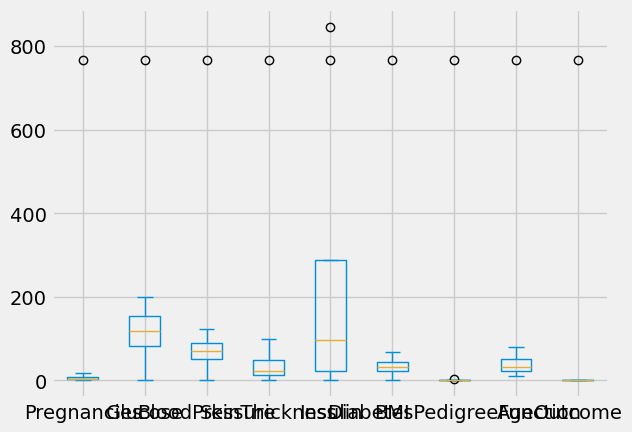

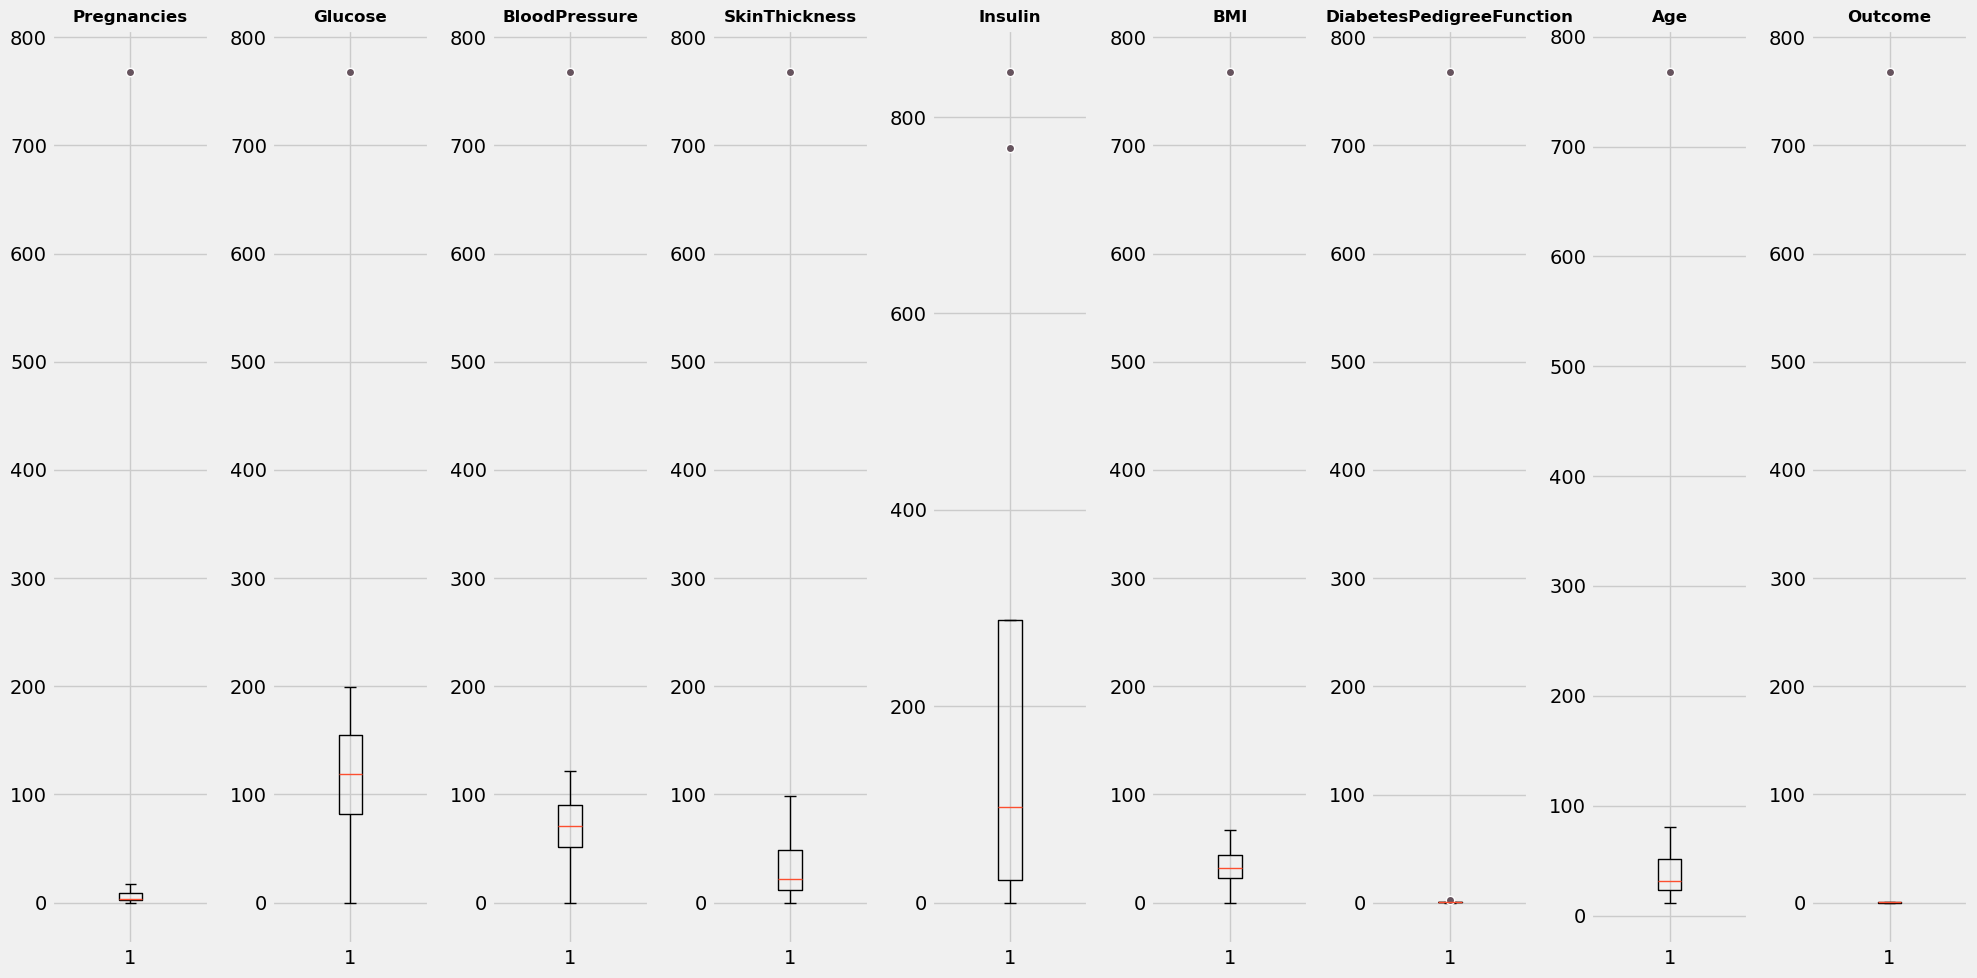

In [20]:
# Displaying all columns on a boxplot
two_df.plot(kind='box')
circle = dict(markerfacecolor='#66545e', marker='o', markeredgecolor='white')

fig, axs = matplotlib.pyplot.subplots(1, len(two_df.columns), figsize=(20, 10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(two_df.iloc[:, i], flierprops=circle)
    ax.set_title(two_df.columns[i], fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

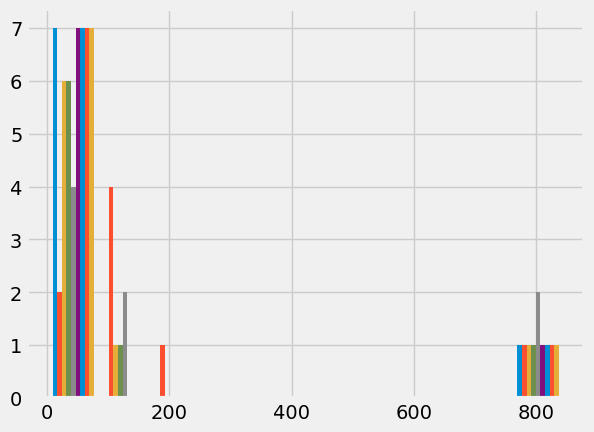

In [23]:
# Displaying histogram.
matplotlib.pyplot.hist(two_df)
matplotlib.pyplot.show()

#    TRAIN TEST SPLIT

In [25]:
# Separating the independent and dependent variables.
x = df.drop('Outcome', axis=1) # independent variables
y = df['Outcome']       #dependent variable


In [26]:
# 80% of the dataset will used for training the model.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
108,3,83,58,31,18,34.3,0.336,25
375,12,140,82,43,325,39.2,0.528,58
730,3,130,78,23,79,28.4,0.323,34
343,5,122,86,0,0,34.7,0.290,33
85,2,110,74,29,125,32.4,0.698,27
...,...,...,...,...,...,...,...,...
235,4,171,72,0,0,43.6,0.479,26
180,6,87,80,0,0,23.2,0.084,32
112,1,89,76,34,37,31.2,0.192,23
296,2,146,70,38,360,28.0,0.337,29


In [31]:
# Training the model, reserving 20% of the data for testing
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [32]:
# Making predictions
prediction = model.predict(x_test)
prediction

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [33]:
# Evaluate the accuracy of the model prediction
accuracy = accuracy_score(prediction, y_test)
accuracy

0.7792207792207793